# Bibliotecas

In [176]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, roc_curve

sns.set_style('dark')

# Bases de Dados

In [231]:
# Exemplo de criação de uma base de dados desbalanceada
X, y = make_classification(
    n_samples = 100000,  
    n_features = 10, 
    n_informative = 10, 
    n_redundant = 0,
    n_classes = 2, 
    weights = [0.99, 0.01],
    flip_y = 0,
    random_state = 42
)

# Transforma o output anterior em um DataFrame
df = pd.DataFrame(X, columns = [f"X_{i}" for i in range(X.shape[1])])
df['y'] = y

df['y'].value_counts()

y
0    99000
1     1000
Name: count, dtype: int64

# [Simulação] Perda de Performance conforme o desbalanceamento da base aumenta

In [245]:
# Vamos gerar bases de dados desbalanceadas de 50% até 1% de desbalanceamento
prop_list = [round(x, 2) for x in np.arange(0.5, 0.001, -0.01)]
metricas = pd.DataFrame()

for prop in prop_list:
    
    X, y = make_classification(
        n_samples = 100000,  
        n_features = 10, 
        n_informative = 10, 
        n_redundant = 0,
        n_classes = 2, 
        weights = [1 - prop, prop],
        flip_y = 0.01,
        random_state = 42
    )
    
    # Separa o conjunto em base de treino e teste
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size = 0.3,
        random_state = 42
    )
    
    lr = LogisticRegression(
        penalty = None,
        random_state = 42
    )   
    
    lr.fit(X_train, y_train)
    
    # Otimização do melhor ponto de corte
    y_probs = lr.predict_proba(X_test)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test, y_probs)

    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]

    # Métricas & Previsão
    y_pred = [1 if x >= optimal_threshold else 0 for x in y_probs]
    
    performance = pd.DataFrame(
        {
            "Proporção" : [prop],
            "Acurácia" :[accuracy_score(y_test, y_pred)],
            "Acurácia Balanceada" : [balanced_accuracy_score(y_test, y_pred)],
            "Precisão" : [precision_score(y_test, y_pred)],
            "Recall" : [recall_score(y_test, y_pred)],
            "F1 Score" : [f1_score(y_test, y_pred)],
            "ROC AUC Score" : [roc_auc_score(y_test, y_pred)],
            "Optimal Threshold" : [optimal_threshold]
        }
    )

    metricas = pd.concat([metricas, performance], ignore_index = True)
    
metricas.head()

,Proporção,Acurácia,Acurácia Balanceada,Precisão,Recall,F1 Score,ROC AUC Score,Optimal Threshold
0,0.50,0.848333,0.848320,0.847994,0.850806,0.849398,0.848320,0.492553
1,0.49,0.847933,0.847995,0.841166,0.851987,0.846542,0.847995,0.478769
2,0.48,0.847867,0.847975,0.836345,0.851030,0.843624,0.847975,0.470332
3,0.47,0.847433,0.847553,0.831449,0.849785,0.840517,0.847553,0.461239
4,0.46,0.847433,0.847596,0.826005,0.849827,0.837747,0.847596,0.450254


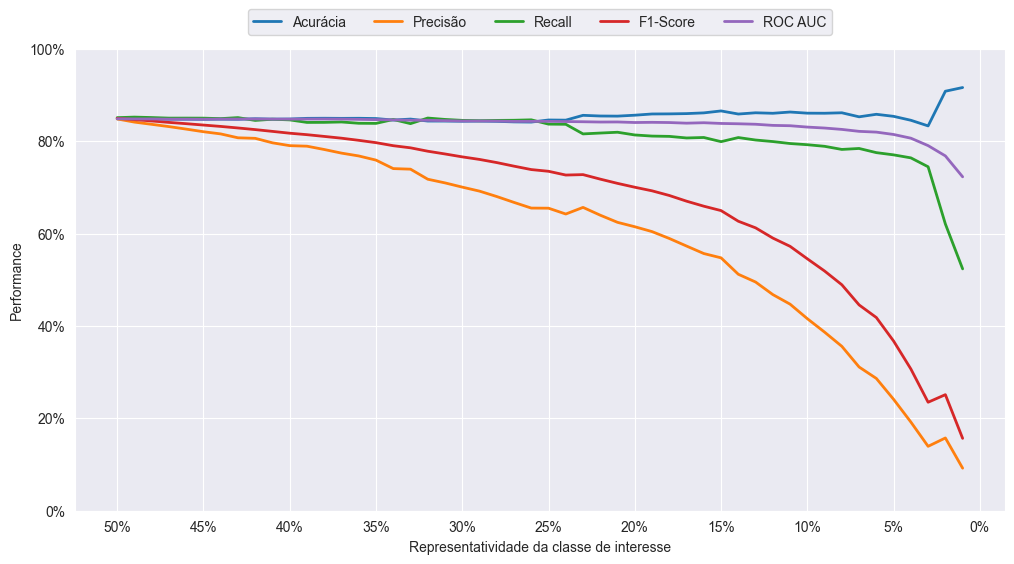

In [247]:
plt.figure(figsize=(12, 6))

plt.plot(
    metricas['Proporção'],
    metricas['Acurácia'],
    linewidth=2,
    label='Acurácia'
)
plt.plot(
    metricas['Proporção'],
    metricas['Precisão'],
    linewidth=2,
    label='Precisão'
)
plt.plot(
    metricas['Proporção'],
    metricas['Recall'],
    linewidth=2,
    label='Recall'
)
plt.plot(
    metricas['Proporção'],
    metricas['F1 Score'],
    linewidth=2,
    label='F1-Score'
)
plt.plot(
    metricas['Proporção'],
    metricas['ROC AUC Score'],
    linewidth=2,
    label='ROC AUC'
)

plt.gca().invert_xaxis()

# Eixo Y
plt.yticks(
    np.arange(0, 1.1, 0.2),
    [f'{int(i*100)}%' for i in np.arange(0, 1.1, 0.2)]
)
plt.ylim(0, 1)

# Eixo X
plt.xticks(
    np.linspace(0.5, 0, 11),
    [f'{int(np.ceil(i*100))}%' for i in np.linspace(0.5, 0, 11)]
)

plt.xlabel("Representatividade da classe de interesse")
plt.ylabel("Performance")

plt.legend(
    loc='upper center',
    ncol=10,
    bbox_to_anchor=(0.5, 1.1)
)
plt.grid()
plt.plot()

plt.show()


In [241]:
# Vamos gerar bases de dados desbalanceadas de 50% até 1% de desbalanceamento
prop_list = [round(x, 3) for x in np.arange(0.01, 0.0001, -0.001)]
metricas_caso_extremo = pd.DataFrame()

for prop in prop_list:
    print(prop) 
    
    X, y = make_classification(
        n_samples = 100000,  
        n_features = 10, 
        n_informative = 10, 
        n_redundant = 0,
        n_classes = 2, 
        flip_y = 0.01,
        weights = [1 - prop, prop],
        random_state = 42
    )
    
    # Separa o conjunto em base de treino e teste
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size = 0.3,
        random_state = 42
    )
    
    lr = LogisticRegression(
        penalty = None,
        random_state = 42
    )   
    
    lr.fit(X_train, y_train)
    
    # Otimização do melhor ponto de corte
    y_probs = lr.predict_proba(X_test)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test, y_probs)

    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]

    # Métricas & Previsão
    y_pred = [1 if x >= optimal_threshold else 0 for x in y_probs]
    
    performance = pd.DataFrame(
        {
            "Proporção" : [prop],
            "Acurácia" :[ accuracy_score(y_test, y_pred)],
            "Acurácia Balanceada" : [balanced_accuracy_score(y_test, y_pred)],
            "Precisão" : [precision_score(y_test, y_pred)],
            "Recall" : [recall_score(y_test, y_pred)],
            "F1 Score" : [f1_score(y_test, y_pred)],
            "ROC AUC Score" : [roc_auc_score(y_test, y_pred)],
            "Optimal Threshold" : [optimal_threshold]
        }
    )

    metricas_caso_extremo = pd.concat([metricas_caso_extremo, performance], ignore_index = True)

0.01
0.009
0.008
0.007
0.006
0.005
0.004
0.003
0.002
0.001


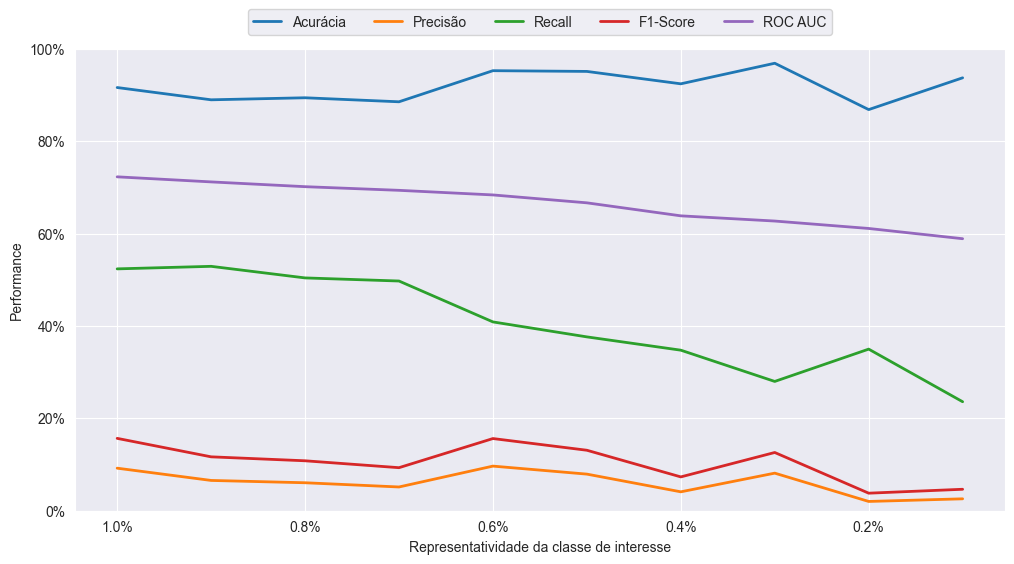

In [244]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))

plt.plot(
    metricas_caso_extremo['Proporção'],
    metricas_caso_extremo['Acurácia'],
    linewidth=2,
    label='Acurácia'
)
plt.plot(
    metricas_caso_extremo['Proporção'],
    metricas_caso_extremo['Precisão'],
    linewidth=2,
    label='Precisão'
)
plt.plot(
    metricas_caso_extremo['Proporção'],
    metricas_caso_extremo['Recall'],
    linewidth=2,
    label='Recall'
)
plt.plot(
    metricas_caso_extremo['Proporção'],
    metricas_caso_extremo['F1 Score'],
    linewidth=2,
    label='F1-Score'
)
plt.plot(
    metricas_caso_extremo['Proporção'],
    metricas_caso_extremo['ROC AUC Score'],
    linewidth=2,
    label='ROC AUC'
)

plt.gca().invert_xaxis()

# Eixo Y
plt.yticks(
    np.arange(0, 1.1, 0.2),
    [f'{int(i*100)}%' for i in np.arange(0, 1.1, 0.2)]
)
plt.ylim(0, 1)

# Eixo X
plt.xticks(
    np.linspace(0.01, 0, 6),
    [f'{i*100}%' for i in np.linspace(0.01, 0, 6)]
)

plt.xlabel("Representatividade da classe de interesse")
plt.ylabel("Performance")

plt.legend(
    loc='upper center',
    ncol=10,
    bbox_to_anchor=(0.5, 1.1)
)
plt.grid()
plt.plot()

plt.show()


# Apenas balancear o algoritmo pode resolver o problema?

In [236]:
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
# Vamos gerar bases de dados desbalanceadas de 50% até 1% de desbalanceamento
prop_list = [round(x, 2) for x in np.arange(0.05, 0.001, -0.01)]
metricas_classico = pd.DataFrame()
metricas_balanceado = pd.DataFrame()

for prop in prop_list:
    
    X, y = make_classification(
        n_samples = 10000,  
        n_features = 20, 
        n_informative = 10, 
        n_redundant = 10,
        n_classes = 2, 
        weights = [1-prop],
        random_state = 42
    )
    
    # Separa o conjunto em base de treino e teste
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size = 0.3,
        random_state = 42
    )
    
    max_strategy = sum(y_train == 1) / sum(y_train == 0)
    sampling_strategies = np.linspace(1, max_strategy, 20)[:-1]

    
    # XGBoost clássico
    lr = LogisticRegression(random_state=42)
    lr.fit(X_train, y_train)
    
    
    
    # XGBoost com undersampling
    best_f1_score = 0
    best_strategy = None
    
    for strategy in sampling_strategies:
        rus = RandomUnderSampler(
            random_state=42,
            sampling_strategy=strategy
        )
        
        X_res, y_res = rus.fit_resample(X_train, y_train)
        
        lr_balanced = LogisticRegression(random_state=42)
        lr_balanced.fit(X_res, y_res)
        
        # Otimização do melhor ponto de corte
        y_probs_balanced = lr_balanced.predict_proba(X_test)[:, 1]
        fpr_balanced, tpr_balanced, thresholds_balanced = roc_curve(y_test, y_probs_balanced)
        optimal_idx_balanced = np.argmax(tpr_balanced - fpr_balanced)
        optimal_threshold_balanced = thresholds_balanced[optimal_idx_balanced]
        y_pred_balanced = [1 if x >= optimal_threshold_balanced else 0 for x in y_probs_balanced]
        
        # Métricas
        f1 = f1_score(y_test, y_pred_balanced)
        
        if f1 > best_f1_score:
            best_f1_score = f1
            best_strategy = strategy
    
    # Treina o modelo com a melhor estratégia
    rus = RandomUnderSampler(
        random_state=42,
        sampling_strategy=best_strategy
    )
    
    X_res, y_res = rus.fit_resample(X_train, y_train)
    
    lr_balanced = LogisticRegression(random_state=42)
    lr_balanced.fit(X_res, y_res)
    
    # Otimização do melhor ponto de corte para o XGBoost clássico
    y_probs = lr.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    y_pred = [1 if x >= optimal_threshold else 0 for x in y_probs]
    
    # Métricas para o XGBoost clássico
    performance = pd.DataFrame(
        {
            "Proporção" : [prop],
            "Acurácia" :[accuracy_score(y_test, y_pred)],
            "Acurácia Balanceada" : [balanced_accuracy_score(y_test, y_pred)],
            "Precisão" : [precision_score(y_test, y_pred)],
            "Recall" : [recall_score(y_test, y_pred)],
            "F1 Score" : [f1_score(y_test, y_pred)],
            "ROC AUC Score" : [roc_auc_score(y_test, y_pred)],
            "Optimal Threshold" : [optimal_threshold]
        }
    )
    
    # Otimização do melhor ponto de corte para o XGBoost com undersampling
    y_probs_balanced = lr_balanced.predict_proba(X_test)[:, 1]
    fpr_balanced, tpr_balanced, thresholds_balanced = roc_curve(y_test, y_probs_balanced)
    optimal_idx_balanced = np.argmax(tpr_balanced - fpr_balanced)
    optimal_threshold_balanced = thresholds_balanced[optimal_idx_balanced]
    y_pred_balanced = [1 if x >= optimal_threshold_balanced else 0 for x in y_probs_balanced]
    
    # Métricas para o XGBoost com undersampling
    performance_balanced = pd.DataFrame(
        {
            "Proporção" : [prop],
            "Acurácia" :[accuracy_score(y_test, y_pred_balanced)],
            "Acurácia Balanceada" : [balanced_accuracy_score(y_test, y_pred_balanced)],
            "Precisão" : [precision_score(y_test, y_pred_balanced)],
            "Recall" : [recall_score(y_test, y_pred_balanced)],
            "F1 Score" : [f1_score(y_test, y_pred_balanced)],
            "ROC AUC Score" : [roc_auc_score(y_test, y_pred_balanced)],
            "Optimal Threshold" : [optimal_threshold_balanced]
        }
    )
    
    metricas_classico = pd.concat([metricas_classico, performance], ignore_index = True)
    metricas_balanceado = pd.concat([metricas_balanceado, performance_balanced], ignore_index = True)


In [237]:
metricas_classico

,Proporção,Acurácia,Acurácia Balanceada,Precisão,Recall,F1 Score,ROC AUC Score,Optimal Threshold
0,0.05,0.800333,0.804802,0.188571,0.809816,0.305910,0.804802,0.047038
1,0.04,0.812333,0.815430,0.173579,0.818841,0.286439,0.815430,0.042593
2,0.03,0.810667,0.800938,0.131955,0.790476,0.226158,0.800938,0.034827
3,0.02,0.840000,0.793082,0.111969,0.743590,0.194631,0.793082,0.030935
4,0.01,0.797333,0.788814,0.061321,0.780000,0.113703,0.788814,0.015243


In [238]:
metricas_balanceado

,Proporção,Acurácia,Acurácia Balanceada,Precisão,Recall,F1 Score,ROC AUC Score,Optimal Threshold
0,0.05,0.917000,0.797097,0.357616,0.662577,0.464516,0.797097,0.435771
1,0.04,0.913333,0.799395,0.301948,0.673913,0.417040,0.799395,0.506093
2,0.03,0.921000,0.803035,0.259124,0.676190,0.374670,0.803035,0.621786
3,0.02,0.930667,0.783473,0.214912,0.628205,0.320261,0.783473,0.170579
4,0.01,0.932667,0.759322,0.138095,0.580000,0.223077,0.759322,0.297779


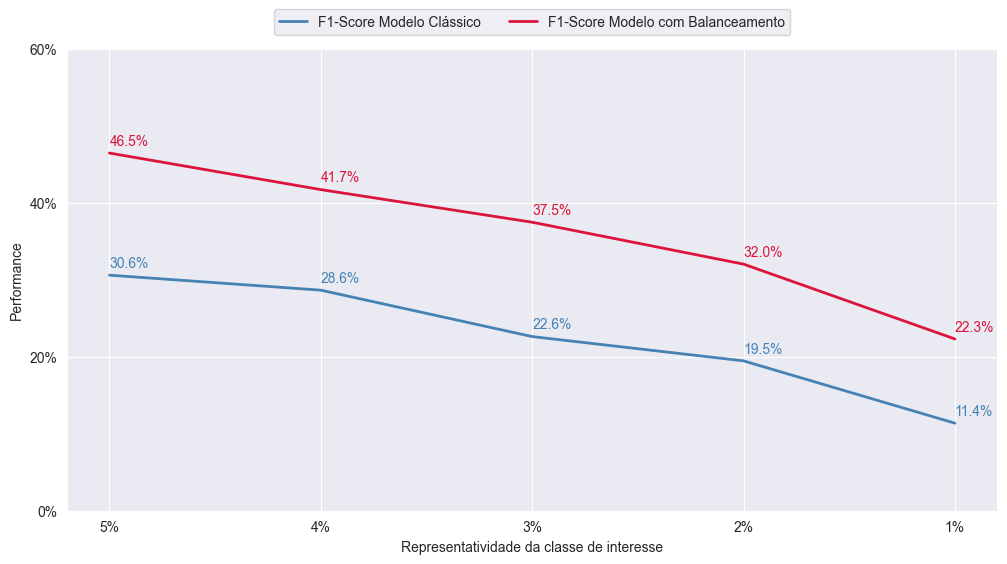

In [239]:
plt.figure(figsize=(12, 6))

# Plot para o modelo clássico
plt.plot(
    metricas_classico['Proporção'],
    metricas_classico['F1 Score'],
    linewidth=2,
    label='F1-Score Modelo Clássico',
    color='steelblue'
)

# Adiciona rótulos para o modelo clássico
for i, txt in enumerate(metricas_classico['F1 Score']):
    plt.annotate(f'{txt:.1%}', (metricas_classico['Proporção'][i], metricas_classico['F1 Score'][i]+0.01), color='steelblue')

# Plot para o modelo com balanceamento
plt.plot(
    metricas_balanceado['Proporção'],
    metricas_balanceado['F1 Score'],
    linewidth=2,
    label='F1-Score Modelo com Balanceamento',
    color='crimson'
)

# Adiciona rótulos para o modelo com balanceamento
for i, txt in enumerate(metricas_balanceado['F1 Score']):
    plt.annotate(f'{txt:.1%}', (metricas_balanceado['Proporção'][i], metricas_balanceado['F1 Score'][i]+0.01), color='crimson')

plt.gca().invert_xaxis()

# Eixo Y
plt.yticks(
    np.arange(0, 1.1, 0.2),
    [f'{int(i*100)}%' for i in np.arange(0, 1.1, 0.2)]
)
plt.ylim(0, 0.6)

# Eixo X
plt.xticks(
    np.linspace(0.05, 0, 6),
    [f'{int(i*100)}%' for i in np.linspace(0.05, 0, 6)]
)
plt.xlabel("Representatividade da classe de interesse")
plt.ylabel("Performance")

plt.legend(
    loc='upper center',
    ncol=10,
    bbox_to_anchor=(0.5, 1.1)
)
plt.grid()
plt.plot()

plt.show()
